<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ScratchKMeans():
    
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def _remyu(self,x):
        for j in range (self.n_clusters):
            self.myu[j]=np.mean(x[x[:,-1]==j,:-1],axis=0)
    def _reclustering(self,x):
        for i in range(len(x)):
            dist_m=10**10
            for j in range(self.n_clusters):
                dist=np.sqrt(np.sum((x[i,:-1]-self.myu[j])**2))
                if dist<dist_m:
                   dist_m=dist
                   x[i,-1]=j
    def _sse(self,x):
        self.best_sse=10**10
        sse=0
        for i in range(len(x)): 
            for j in range(self.n_clusters):
                if j==x[i,-1]:
                   sse+=np.sum(x[i,:-1]-self.myu[j]**2)
        if self.best_sse>sse:
           self.best_sse=sse
           self.record_myu=self.record_myu
          #  self.record_clusr=self.n_clusters
    def _silhouett(self,x):
        return 
    def fit(self,x):
        for k in range (self.n_init):
            self.myu=x[np.random.choice(len(x),size=self.n_clusters,replace=False)]
            cluster=np.zeros(len(x))
            x_cluster=np.concatenate([x,cluster.reshape(-1,1)],axis=1)
            for ite in range (self.max_iter):
                self._reclustering(x_cluster)
                old_myu=self.myu
                self._remyu(x_cluster)

                if self.verbose:
                   fig=plt.subplots(figsize=(10,8))
                   plt.rcparams["font.size"]=20

                   for i in range (self.n_clusters):
                       plt.scatter(x[x_cluster[:,-1]==i,0],x[x_cluster[:,-1]==1],s=80)
                   plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                   plt.show()
                if np.sum(old_myu-self.myu)<self.tol:
                   self._sse(x_cluster)
                   break
                self._sse(x_cluster)   
    def predict(self,x):
        y_pred=np.zeros(len(x))
        for i in range (len(x)):
            dist_m=10**10
            for j in range(self.record_clucter):
                dist=np.sqrt+(np.sum((x[i]-self.record_myu[j])**2))
                if dist<dist_m:
                   dist_m=dist
                   y_pred[i]=j
        return y_pred              

In [3]:
class ScratchKMeans_speed():
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def _remyu(self,x):
        for j in range (self.n_clusters):
            self.myu[j]=np.mean(x[x[:,-1]==j,:-1],axis=0)

    def _reclustering(self,x):
        diff=(x-self.myu[:,None]).reshape(-1,2)
        self.dist=np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T

        self.cluster=np.argmin(self.dist,axis=1)

    def _sse(self,x):    
        diff=(x-self.myu[:,None]).reshape(-1,2)
        self.dist=np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        sse=np.sum(np.min(self.dist,axis=1)**2)

        self.best_sse=10**10
        if self.best_sse>sse:
           self.best_sse=sse
           self.record_myu=self.record_myu
           self.record_cluster=self.n_clusters
           self._silhouette(x) if self.n_clusters>=2 else _

    def _silhouett(self,x):
        ab=np.zeros([len(x),2])
        self.silhouette_vals=np.zeros(len(x))
        for i,j in enumerate(x):
            ab[i,0]=np.mean(np.linalg.norm(j-x[self.cluster==self.cluster[i]],ord=2,axis=1))/len(x[self.cluster==self.cluster[i]]-1)
            ab[i,1]=np.mean(np.linalg.norm(j-x[self.cluster==self.dist[i].argsort()[1]],ord=2,axis=1))

            self.silhouette_vals[i]=(ab[i,1] - ab[1,0])/np.max(ab[i])
        self.silouett_avg=np.mean(self.silhouette_vals)
        self.y_km=self.cluster
        self.cluster_labels=np.unique(self.cluster)

    def fit(self,x):
        for k in range (self.n_init):
            self.myu=x[np.random.choice(len(x),size=self.n_clusters,replace=False)]
            
            for ite in range (self.max_iter):
                self._reclustering(x)
                old_myu=self.myu
                self._remyu(x) 
                if self.verbose:
                   fig=plt.subplots(figsize=(10,8))
                   plt.rcparams["font.size"]=20

                   for i in range (self.n_clusters):
                       plt.scatter(x[self.cluster==i,0],x[self.clustercluster==i,1],s=80)
                   plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                   plt.show()
                if np.sum(old_myu-self.myu)<self.tol:
                   self._sse(x)
                   break
                self._sse(x) 
    def predict(self,x):
         diff=(x-self.record_myu[:,None]).reshape(-1,2)
         dist=np.linalg.norm(diff,ord=2,axis=1).reshape(self.record_clusters,-1).T
         return np.argmin(dist,axis=1)
         




In [4]:
from sklearn.datasets import make_blobs

x, _ = make_blobs(n_samples=100,n_features=2,centers=4,cluster_std=0.5,shuffle=True,random_state=0)

In [5]:
x.shape

(100, 2)

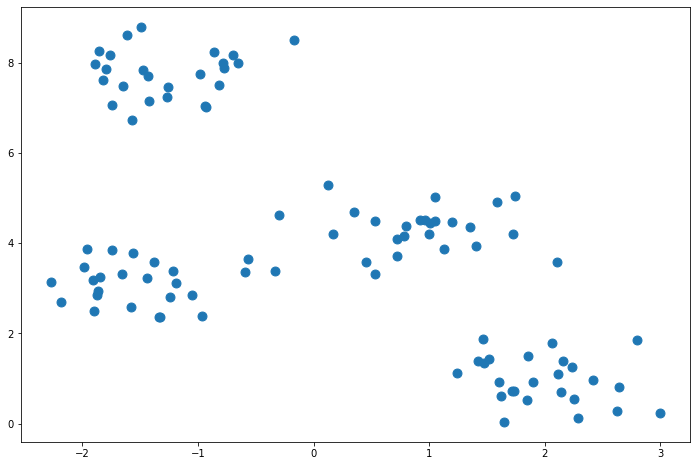

In [6]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(x[:,0],x[:,1],s=80);

In [7]:
k=2
myu= x [np.random.choice(len(x),size=k,replace=False)]
print(myu.shape)
print(myu)

(2, 2)
[[ 1.05374379  4.49286859]
 [-0.59312453  3.37090459]]


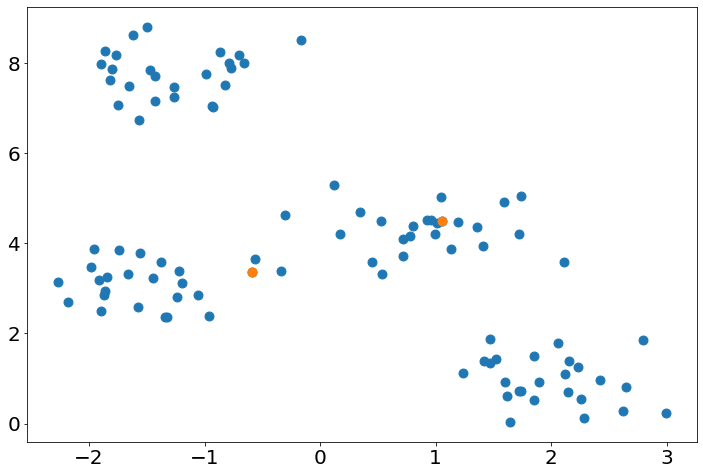

In [8]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(x[:,0],x[:,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

In [9]:
num=10
label=np.random.randint(0,k,len(x[0:num]))
x_test=np.concatenate([x[0:num],label.reshape(-1,1)],axis=1)
print(x_test.shape)
print(x_test)

(10, 3)
[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  1.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  1.        ]]


In [10]:
np.sqrt(np.sum((x[0]-myu[0])**2))

0.8475062542327919

In [11]:
np.linalg.norm(x[0]-myu[0],ord=2)
       


0.8475062542327919

In [12]:
for i in range (5):
    for j in range(len(myu)):
        if j ==x_test[i,2]:
            sse=np.sqrt(sum((x_test[i,0:2]-myu[j])**2))
    print (sse) 
   

0.8475062542327919
4.558137365276674
0.32906355402062953
0.0
2.6693807768642372


In [13]:
for i in range (5):
    for j in range(len(myu)):
        if j ==x_test[i,2]:
            sse=np.linalg.norm(x_test[i,0:2]-myu[j])
    print (sse) 

0.8475062542327919
4.558137365276674
0.32906355402062953
0.0
2.6693807768642372


In [14]:
for i in range (5):
    dist_m=10**10
    for j in range(len(myu)):
        dist=np.sqrt(np.sum((x_test[1,:-1]-myu[j])**2))
        print(dist)
        if dist<dist_m:
            dist_m=dist
            x_test[i,-1]=j
    print('New_Label:',x_test[i,2])        

        

4.558137365276674
4.778745153017461
New_Label: 0.0
4.558137365276674
4.778745153017461
New_Label: 0.0
4.558137365276674
4.778745153017461
New_Label: 0.0
4.558137365276674
4.778745153017461
New_Label: 0.0
4.558137365276674
4.778745153017461
New_Label: 0.0


In [15]:
dist_nd=np.zeros([len(x),k])
print(dist_nd.shape)

for i in range(len(x)):
    for j in range(k):
        dist_nd[i,j]=np.linalg.norm(x[i]-myu[j])
print(dist_nd[0:5])        

(100, 2)
[[0.84750625 1.35791273]
 [4.55813737 4.77874515]
 [0.32906355 2.18852518]
 [0.         1.99273141]
 [0.67743954 2.66938078]]


In [16]:
show=False
if show:
    for i in range(len(x)):
        for j in range(k):
            print(x[i]-myu[j])
    


In [17]:
norm=(x-myu[:,None]).reshape(-1,2)


cal=np.linalg.norm(norm,ord=2,axis=1).reshape(2,-1).T
cal[0:5]

array([[0.84750625, 1.35791273],
       [4.55813737, 4.77874515],
       [0.32906355, 2.18852518],
       [0.        , 1.99273141],
       [0.67743954, 2.66938078]])

In [18]:
cl=np.argmin(cal,axis=1)
cl

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [19]:
np.mean(x_test[x_test[:,2]==0,:-1],axis=0)

array([0.11142343, 5.18098763])

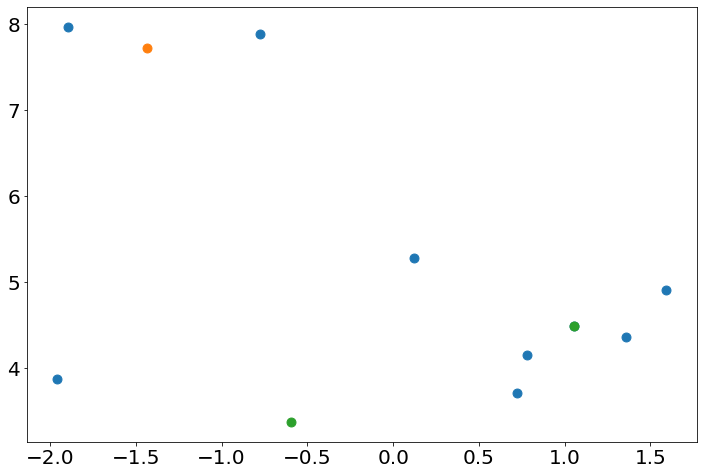

In [20]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(x_test[x_test[:,2]==0,0],x_test[x_test[:,2]==0,1],s=80)
plt.scatter(x_test[x_test[:,2]==1,0],x_test[x_test[:,2]==1,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_valid=\
train_test_split(x,train_size=0.8,random_state=None)

print(x_train.shape)
print(x_valid.shape)

(80, 2)
(20, 2)


In [22]:
clf=ScratchKMeans(n_clusters=4,n_init=50, max_iter=500,tol=1e-5,verbose=False)
clf.fit(x_train)

AttributeError: ignored

In [ ]:
pred=clf.predict(x_valid)
print (pred)

In [ ]:
clf2=ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=True)
clf2.fit(x_train)

In [ ]:
pred=clf2.predict(x_valid)
print (pred)

In [ ]:
clf=ScratchKMeans(n_clusters=4,n_init=50, max_iter=500,tol=1e-5,verbose=False)

In [ ]:
clf2=ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=False)

In [ ]:
elbow={}
for k in range(1,8):
    model=ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(x)
    elbow[k]=model.best_sse

fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');    

In [ ]:
print(myu)
print (myu[1].argsort()[1])

In [ ]:
from matplotlib import cm
plt.rcParams["font.size"]=20s